In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.1.0'

In [0]:
(train_X,train_Y),(test_X,test_Y)=tf.keras.datasets.boston_housing.load_data()

In [5]:
print(len(train_X),len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [0]:
def standardization(train_data,test_data):

  mean=train_data.mean()
  std=train_data.std()

  new_train_data=(train_data-mean)/std
  new_test_data=(test_data-mean)/std

  return new_train_data,new_test_data

In [0]:
train_X,test_X=standardization(train_X,test_X)
train_Y,test_Y=standardization(train_Y,test_Y)

In [8]:
print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [9]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=52,activation='relu',input_shape=(13,)),
                           tf.keras.layers.Dense(units=39,activation='relu'),
                           tf.keras.layers.Dense(units=26,activation='relu'),
                           tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model.fit(train_X,train_Y,epochs=25,batch_size=32,validation_split=0.25)

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 1s 2ms/sample - loss: 4.6939 - val_loss: 1.1908
Epoch 2/25
303/303 [==============================] - 0s 117us/sample - loss: 0.9005 - val_loss: 1.0143
Epoch 3/25
303/303 [==============================] - 0s 118us/sample - loss: 0.6957 - val_loss: 1.1306
Epoch 4/25
303/303 [==============================] - 0s 115us/sample - loss: 0.7536 - val_loss: 1.0705
Epoch 5/25
303/303 [==============================] - 0s 114us/sample - loss: 0.7004 - val_loss: 1.0352
Epoch 6/25
303/303 [==============================] - 0s 106us/sample - loss: 0.6592 - val_loss: 1.0977
Epoch 7/25
303/303 [==============================] - 0s 128us/sample - loss: 0.6463 - val_loss: 1.0407
Epoch 8/25
303/303 [==============================] - 0s 123us/sample - loss: 0.6415 - val_loss: 1.1159
Epoch 9/25
303/303 [==============================] - 0s 122us/sample - loss: 0.6346 - val_loss: 1.0178
Epoch 10/25
303/303 

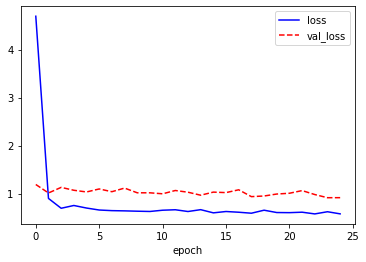

In [11]:
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('epoch')
plt.legend() #범주
plt.show()

In [12]:
model.evaluate(test_X,test_Y) #test loss

102/102 [==============================] - 0s 89us/sample - loss: 0.6600


0.6600259822957656

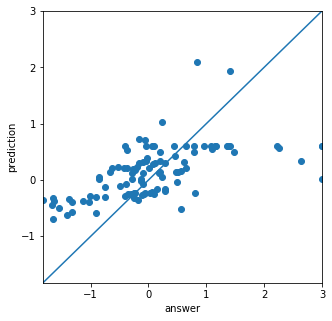

In [13]:
pred_Y=model.predict(test_X)

plt.figure(figsize=(5,5))
plt.scatter(test_Y,pred_Y)
plt.xlabel("answer")
plt.ylabel("prediction")
plt.axis([min(test_Y),max(test_Y),min(test_Y),max(test_Y)])
plt.plot([min(test_Y),max(test_Y)],[min(test_Y),max(test_Y)])

In [14]:
history=model.fit(train_X,train_Y,epochs=25,batch_size=32,validation_split=0.25,
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss')]) #val_loss가 3회 에포크동안 최고 기록을 갱신하지 못하면 학습종료

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 129us/sample - loss: 0.5588 - val_loss: 1.0007
Epoch 2/25
303/303 [==============================] - 0s 123us/sample - loss: 0.5389 - val_loss: 0.9751
Epoch 3/25
303/303 [==============================] - 0s 124us/sample - loss: 0.5591 - val_loss: 0.9409
Epoch 4/25
303/303 [==============================] - 0s 116us/sample - loss: 0.5984 - val_loss: 1.0812
Epoch 5/25
303/303 [==============================] - 0s 121us/sample - loss: 0.5812 - val_loss: 0.8914
Epoch 6/25
303/303 [==============================] - 0s 117us/sample - loss: 0.6099 - val_loss: 0.8967
Epoch 7/25
303/303 [==============================] - 0s 116us/sample - loss: 0.5698 - val_loss: 0.8879
Epoch 8/25
303/303 [==============================] - 0s 141us/sample - loss: 0.5999 - val_loss: 0.8718
Epoch 9/25
303/303 [==============================] - 0s 136us/sample - loss: 0.5502 - val_loss: 1.1970
Epoch 10/25
303/30

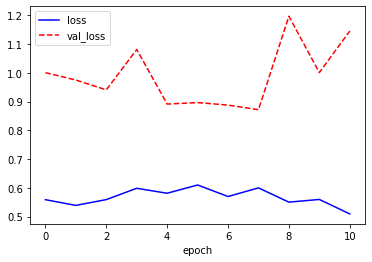

In [15]:
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('epoch')
plt.legend() #범주
plt.show()

In [16]:
model.evaluate(test_X,test_Y)

102/102 [==============================] - 0s 98us/sample - loss: 0.7889


0.7889041479896096

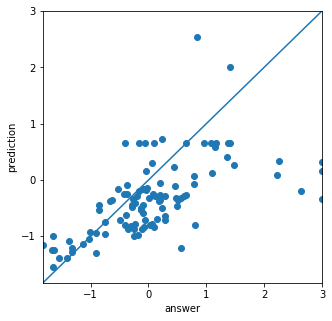

In [17]:
pred_Y=model.predict(test_X)
plt.figure(figsize=(5,5))
plt.scatter(test_Y,pred_Y)
plt.xlabel("answer")
plt.ylabel("prediction")
plt.axis([min(test_Y),max(test_Y),min(test_Y),max(test_Y)])
plt.plot([min(test_Y),max(test_Y)],[min(test_Y),max(test_Y)])